# Kaggle - nivel 1

## Primer Modelo - Regresión Logística

seguimos con la competición Titanic Challenge visto en el punto 1

- v1.1_042020
- author and contact: [marcusRB](https://www.linkedin.com/in/marcusrb)
- [Kaggle - Titanic challenge](https://www.kaggle.com/c/titanic/)

#### NOTA

El primer modelo aplicado es `Regresión Logística` con los parámetros por defecto y solo intercalando las variables independientes `X` calculados por correlación.

En pasos sucesivos se verán otros modelos y así ir comparando los resultados.

***

## Import Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, rfe
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Save the model
import pickle
import joblib


## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.rfe module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection.rfe. Anything that cannot be imported from sklearn.feature_selection.rfe is now part of the private API.
  warnings.warn(message, FutureWarning)


***

## Carga ficheros anteriores

In [2]:
# Carga de los ficheros anteriores ya preprocesados - cambiar la ruta según vuestro directorio o raíz
train_titanic = pd.read_csv('train_feat.csv')
test_titanic = pd.read_csv('test_feat.csv')

In [3]:
train_titanic.head(10)

,Survived,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,0,True,0.432793,-0.473674,0.059160,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,False,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
5,0,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
6,0,True,-0.474545,-0.473674,-0.560975,1,True,1,0,0,...,0,0,1,0,0,0,1,0,0,0
7,0,True,2.247470,0.767630,1.919564,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
8,1,False,-0.474545,2.008933,0.679295,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
9,1,False,0.432793,-0.473674,0.059160,0,False,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [4]:
test_titanic.head(10)

,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1,False,0.616992,-0.400248,0.105643,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,True,-0.499470,-0.400248,-0.553443,1,False,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,False,0.616992,0.619896,0.764728,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
5,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
6,False,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
7,True,0.616992,0.619896,0.764728,0,False,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
8,False,-0.499470,-0.400248,-0.553443,1,False,0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
9,True,1.733455,-0.400248,0.764728,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


* * *

### Training and Validation dataset

cargamos el resto de columnas

In [5]:
id = pd.read_csv('test.csv')
PassengerId = id['PassengerId']

In [6]:
PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [7]:
## Columnas de nuestro estudio de correlaciones
cols = pd.read_pickle('cols_feat.pkl')
cols

0    Index(['Title_Mrs', 'Title_Miss', 'InCabin', '...
1    [Sex, SibSp, FamilySize, IsAlone, InCabin, Pcl...
2    [Sex, SibSp, FamilySize, IsAlone, InCabin, Pcl...
3    [Sex, SibSp, Parch, FamilySize, IsAlone, InCab...
4    [Sex, FamilySize, InCabin, Pclass_3, FareGroup...
dtype: object

In [8]:
features = ['cols15', 'colsRNK10', 'colsRNK15', 'colsRNK20', 'colsSPT']
cols15 = cols[0]
colsRNK10 = cols[1]
colsRNK15 = cols[2]
colsRNK20 = cols[3]
colsSPT = cols[4]

In [9]:
cols15

Index(['Title_Mrs', 'Title_Miss', 'InCabin', 'Pclass_1', 'FareGroup_D',
       'Deck_B', 'Embarked_C', 'FamilySize', 'Deck_D', 'AgeGroup_Baby',
       'Deck_E', 'Parch', 'Deck_C', 'RoomGroup_r4', 'Pclass_2'],
      dtype='object')

* * *

## Train and Test data

Dividimos los datos en dos conjuntos, de entrenamiento y de test. Con el conjunto de entrenamiento crearemos el modelo predictivo, y con el de test, lo evaluaremos para ver qué rendimiento tiene.

## Predictive Modeling

[Classification](https://en.wikipedia.org/wiki/Statistical_classification) problems are one of the most common in machine learning. This is [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), that is, algorithms that, based on a set of tagged data, generalize a model that makes the most accurate prediction of the tag in a new set of data of the same type.

In this activity we will focus on showing different measures that we can use to evaluate a classification model.



### Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

source [wikipedia - Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

### `Cols15`

In [10]:
# Split and drop Survived variable
X_cols15 = train_titanic[cols15]
Y = train_titanic['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_cols15, Y, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [11]:
X_train.head()

,Title_Mrs,Title_Miss,InCabin,Pclass_1,FareGroup_D,Deck_B,Embarked_C,FamilySize,Deck_D,AgeGroup_Baby,Deck_E,Parch,Deck_C,RoomGroup_r4,Pclass_2
331,0,0,True,1,0,0,0,-0.560975,0,0,0,-0.473674,1,1,0
733,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,1
382,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,0
704,0,0,False,0,0,0,0,0.059160,0,0,0,-0.473674,0,0,0
813,0,1,False,0,1,0,0,3.159833,0,0,0,2.008933,0,0,0


In [12]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [13]:
X_test.head()

,Title_Mrs,Title_Miss,InCabin,Pclass_1,FareGroup_D,Deck_B,Embarked_C,FamilySize,Deck_D,AgeGroup_Baby,Deck_E,Parch,Deck_C,RoomGroup_r4,Pclass_2
709,0,0,False,0,0,0,1,0.679295,0,0,0,0.767630,0,0,0
439,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,1
840,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,0
720,0,1,False,0,1,0,0,0.059160,0,0,0,0.767630,0,0,1
39,0,1,False,0,0,0,1,0.059160,0,0,0,-0.473674,0,0,0


In [14]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [15]:
# Create a performance_auc dict
performance_auc = {}

In [16]:
model1 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model1

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [17]:
predicted_log1 = model1.predict(X_test)
predicted_log1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [18]:
# Confidence score
logreg_score1 = round(model1.score(X_train,y_train) * 100, 2)

print(logreg_score1)

print(classification_report(y_test, predicted_log1))

83.43
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.71      0.70      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

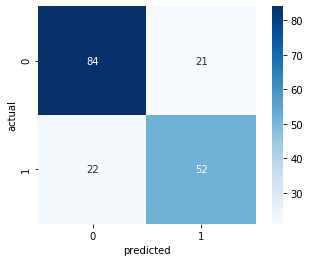

In [19]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log1)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

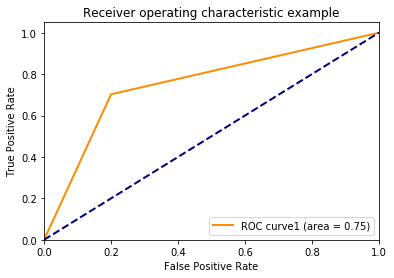

In [20]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log1)
roc_auc1 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc1

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve1 (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `ColsRNK10`

In [22]:
# Split and drop Survived variable
X_colsRNK = train_titanic[colsRNK10]
Y = train_titanic['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_colsRNK, Y, test_size=0.20, random_state=42)

In [23]:
model2 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model2

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [24]:
# Confidence score
logreg_score2 = round(model2.score(X_train,y_train) * 100, 2)
print(logreg_score2)

84.83


In [25]:
predicted_log2 = model2.predict(X_test)
predicted_log2

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [26]:
print(classification_report(y_test, predicted_log2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

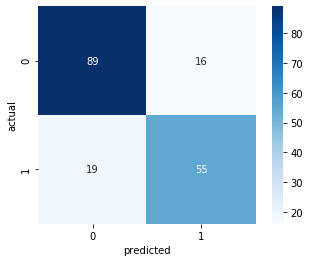

In [27]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log2)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

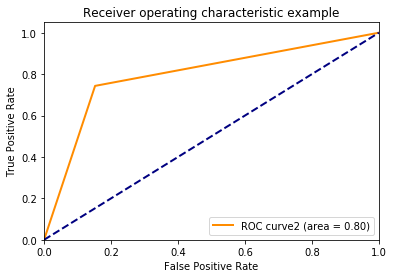

In [28]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log2)
roc_auc2 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc2

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `ColsRNK15`

In [29]:
# Split and drop Survived variable
X_colsRNK = train_titanic[colsRNK15]
Y = train_titanic['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_colsRNK, Y, test_size=0.20, random_state=42)

In [30]:
model2 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model2

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [31]:
# Confidence score
logreg_score2 = round(model2.score(X_train,y_train) * 100, 2)
print(logreg_score2)

84.69


In [32]:
predicted_log2 = model2.predict(X_test)
predicted_log2

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [33]:
print(classification_report(y_test, predicted_log2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

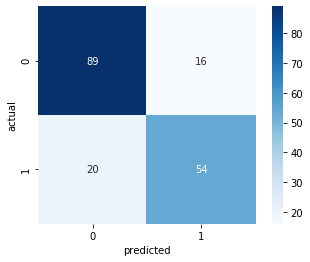

In [34]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log2)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

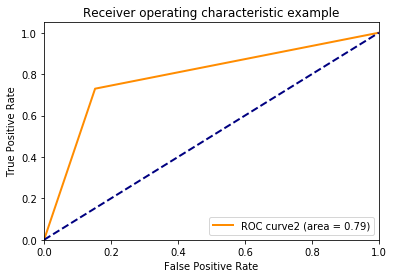

In [35]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log2)
roc_auc2 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc2

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `ColsRNK20`

In [36]:
# Split and drop Survived variable
X_colsRNK = train_titanic[colsRNK20]
Y = train_titanic['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_colsRNK, Y, test_size=0.20, random_state=42)

In [37]:
model2 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model2

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [38]:
# Confidence score
logreg_score2 = round(model2.score(X_train,y_train) * 100, 2)
print(logreg_score2)

84.69


In [39]:
predicted_log2 = model2.predict(X_test)
predicted_log2

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [40]:
print(classification_report(y_test, predicted_log2))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

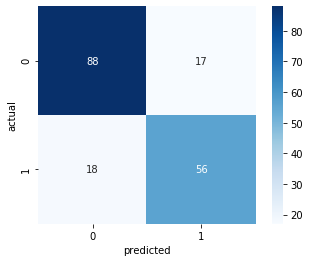

In [41]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log2)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

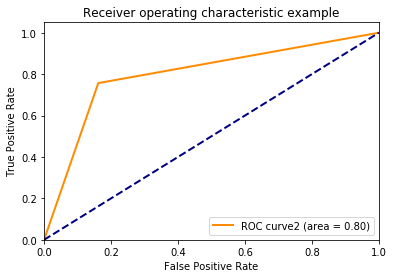

In [42]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log2)
roc_auc2 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc2

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `ColsSPT`

In [43]:
# Split and drop Survived variable
X_colsSPT = train_titanic[colsSPT]
Y = train_titanic['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_colsSPT, Y, test_size=0.20, random_state=42)

In [44]:
model3 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model3

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [45]:
# Confidence score
logreg_score3 = round(model3.score(X_train,y_train) * 100, 2)
print(logreg_score3)

84.13


In [46]:
predicted_log3 = model3.predict(X_test)
predicted_log3

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [47]:
print(classification_report(y_test, predicted_log3))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

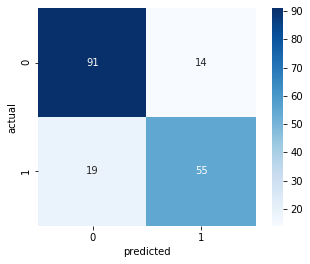

In [48]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log3)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

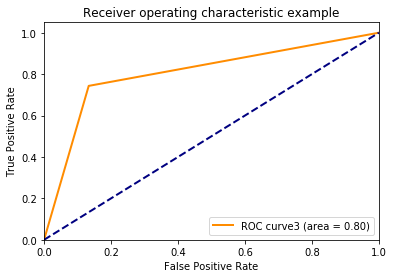

In [49]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log3)
roc_auc3 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc3

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve3 (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Conclusion and Model Evaluation

Después de aplicar diferentes modelos de clasificación, y viendo que no hay demasiadas diferencias de rendimiento entre ellos, el que mejor resultado nos ha dado con la métrica que hemos escogido ha sido el de Support Vector Machines.


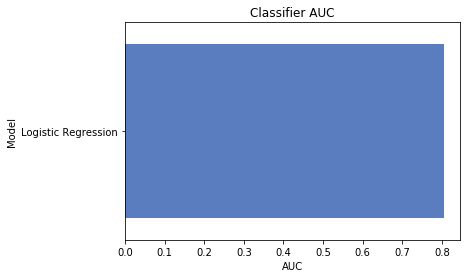

In [50]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

In [51]:
models = pd.DataFrame({
    'Model': ['LogisticRegression_1',
             'LogisticRegression_2',
             'LogisticRegression_3'],
    'Score': [logreg_score1,
             logreg_score2,
             logreg_score3]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,LogisticRegression_2,84.69
2,LogisticRegression_3,84.13
0,LogisticRegression_1,83.43


* * * 

## Validation with Logistic Regression colsSPT

Aplicaremos el mejor modelo al dataset de validación

In [52]:
# Testing with Logistic Regression
X_val = test_titanic[colsSPT]
predicted_LR = model3.predict(X_val)

In [53]:
len(predicted_LR)

418

* * * 

## Kaggle Submission

https://github.com/Kaggle/kaggle-api

In [ ]:
#!pip install kaggle

In [ ]:
#mkdir ~/.kaggle

In [ ]:
#mv kaggle.json ~/.kaggle/kaggle.json

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kaggle

In [ ]:
!kaggle competitions -h

In [ ]:
!kaggle competitions list --category gettingStarted

In [ ]:
!kaggle competitions list -s titanic

In [ ]:
!kaggle competitions leaderboard -s titanic

In [ ]:
!kaggle competitions submissions titanic

In [ ]:
# We submit predicted random forest results
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": predicted_LR
    })
submission.to_csv('submission_LR.csv', index=False)

In [ ]:
pd.read_csv("submission_LR.csv")

In [ ]:
!kaggle competitions submit titanic -f submission_LR.csv -m "LogisticRegression colsSPT"

In [ ]:
!kaggle competitions submissions titanic